In [1]:
from pprint import pformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from GaussianNB import GaussianNB 
import metrics
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Load data:

data = pd.read_csv("bodyfat.csv")
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [3]:
# Preprocessing:

predict = 'BodyFat'

Y = data[predict]
X = data.drop(columns=[predict])
Xlabels = X.columns

Y = Y.transform(lambda x: 1 if x <= 5 else (2 if x>5 and x<=14 else (3 if x>14 and x<16 else(4 if x>=16 and x<25 else 5))))

print(f'Target Class:\n{Y.head()}')
print(f'Feature Class:\n{X.head()}')

Y = Y.to_numpy()
X = X.to_numpy()

Target Class:
0    2
1    2
2    5
3    2
4    5
Name: BodyFat, dtype: int64
Feature Class:
   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


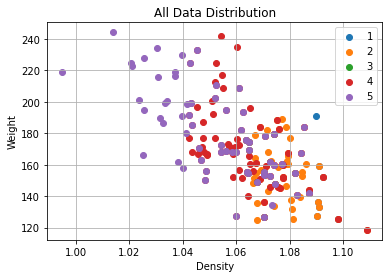

In [4]:
# Distrubuition of data: 

Xd = X.copy()
Yd = Y.copy()

TargetLabels = list(set(Y))

for i in range(len(Yd)):
    for j in range(i + 1, len(Yd)):
        if Yd[i] > Yd[j]:
            Yd[i], Yd[j] = Yd[j], Yd[i]
            Xd[i], Xd[j] = Xd[j], Xd[i]

lens = [0]
setY_ = list(set(Yd))
soma = 0
for i in range(len(setY_)):
    for j in range(len(Yd)):
        if Yd[j] == setY_[i]:
            soma += 1
    lens.append(soma)

plt.figure()
for i in range(len(setY_)):
    plt.scatter(Xd[lens[i]:lens[i+1]-1, 0], Xd[lens[i]:lens[i+1]-1, 2])
plt.legend(TargetLabels)
plt.ylabel(Xlabels[2])
plt.title("All Data Distribution")
plt.xlabel(Xlabels[0])
plt.grid()

In [6]:
# Get all analysis from the best model find:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = GaussianNB()

tempoTreino = time.time()
clf.fit(X_train, Y_train)
tempoTreino = time.time() - tempoTreino

tempoTeste = time.time()
pred, scores = clf.predict(X_test)
tempoTeste = time.time() - tempoTeste

accuracy = metrics.accuracy(Y_test, pred)

matrizConf = metrics.matrizConfusao(Y_test, pred)

print("---------------------------------")
print(f'Tempo de teste = {tempoTeste} e Tempo de treino = {tempoTreino}')
print("---------------------------------")

print("---------------------------------")
print(f'Y_test =   {Y_test}\nPredição = {pred}')
print("---------------------------------")

print("---------------------------------")
print(f'Accuracy = {accuracy}')
print("---------------------------------")

print("---------------------------------")
print(f'Matriz confusão:\n{matrizConf}')
print("---------------------------------")

---------------------------------
Tempo de teste = 0.004963874816894531 e Tempo de treino = 0.002016305923461914
---------------------------------
---------------------------------
Y_test =   [2 2 5 4 4 4 2 4 5 2 1 2 5 2 5 3 4 2 3 3 4 4 4 4 5 2 2 3 2 2 5 2 2 2 5 5 1
 4 5 5 4 2 4 5 4 4 2 1 2 4 4]
Predição = [2. 2. 5. 4. 4. 4. 4. 4. 5. 2. 1. 2. 5. 2. 4. 2. 4. 5. 2. 3. 4. 4. 4. 4.
 4. 2. 2. 2. 2. 2. 4. 2. 3. 2. 5. 5. 1. 5. 4. 5. 4. 2. 2. 4. 4. 4. 2. 1.
 2. 2. 5.]
---------------------------------
---------------------------------
Accuracy = 0.7058823529411765
---------------------------------
---------------------------------
Matriz confusão:
[[ 3.  0.  0.  0.  0.]
 [ 0. 14.  1.  1.  1.]
 [ 0.  3.  1.  0.  0.]
 [ 0.  2.  0. 12.  2.]
 [ 0.  0.  0.  5.  6.]]
---------------------------------
